In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

%matplotlib inline

# [Inserte nombre de proyecto]

- Jorge Andres Mogotocoro Fajardo - 2160075
- 
- 

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#url example './drive/My Drive/Colab Notebooks/Python/Cursos/2019-1 Inteligencia Artificial I/'
# ./drive/My Drive/Colab Notebooks/Python/Cursos/2019-1 Inteligencia Artificial I/Proyectos/Resumen de las tasas de suicidio de 1985 a 2016/master.csv

### No olvidar poner en la variable path la direccion de drive donde se trabaja...
**NOTA:** Experimentando un poco he llegado a la conclusion que no es tan eficiente trabajar varios en un mismos documento por tanto sugiero lo siguiente:

- Las variables *path* dado que es dependiente de cada uno por favor usar celdas independiente con su propia direccion asi el proximo que llegue a editar puede volver a ejecutar su progreso anterior.
- No editar las celdas ya implementadas, en lo posible mejor agregar comentarios sobre dudas o errores cometidos.

In [0]:
#Jorge:
path = './drive/My Drive/Colab Notebooks/Python/Cursos/2019-1 Inteligencia Artificial I/Proyectos/Resumen de las tasas de suicidio de 1985 a 2016/' 

In [0]:
#...
path = ''

In [0]:
#...
path = './drive/My Drive/' 

In [0]:
d = pd.read_csv(path+"export_dataframe.csv")
country_codes = pd.read_csv(path+"wikipedia-iso-country-codes.csv")
print d.shape

(4920, 12)


In [0]:
d.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,32,1985,0,5,202,363000,55.65,Argentina1985,0.694,88.417,3264,0
1,32,1985,0,4,485,1997000,24.29,Argentina1985,0.694,88.417,3264,0
2,32,1985,0,3,414,3346300,12.37,Argentina1985,0.694,88.417,3264,1
3,32,1985,1,4,210,2304000,9.11,Argentina1985,0.694,88.417,3264,0
4,32,1985,0,2,177,2234200,7.92,Argentina1985,0.694,88.417,3264,2


In [0]:
#d.drop(d.index[d.country == 410].values, inplace=True)
#d.drop(d.index[d.country == 643].values, inplace=True)

## $X_1$. Graficas:

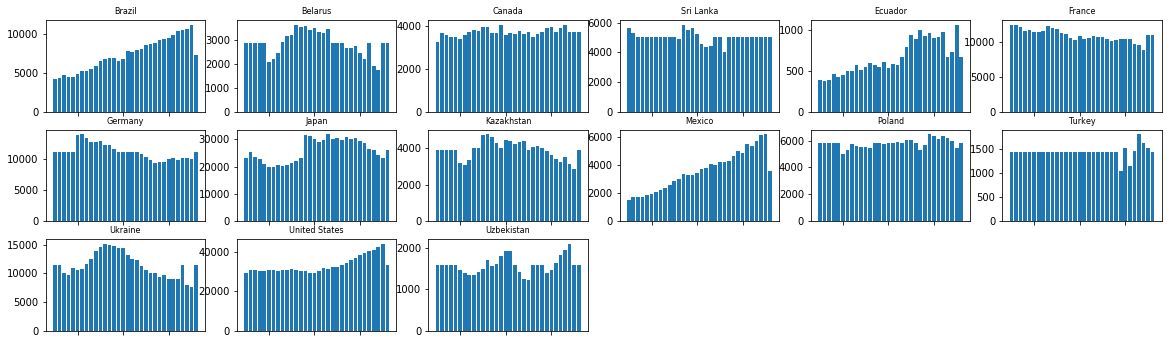

In [0]:
v=np.unique(d.country)
plt.figure(figsize=(20,40))
y=range(1985, 2017)
for i in range(1,len(v)):
  ant=d[d.country==v[i]]
  sn=[]
  for j in y:
    s=ant[ant.year==j].suicides_no.sum()
    sn=np.append(sn,s)
  sn[sn==0]=np.mean(sn[sn>0])
  plt.subplot(20,6,i).set_xticklabels([]),plt.bar(y,sn),plt.title( country_codes.English_short_name_lower_case[country_codes.Numeric_code == v[i]].values[0] , fontsize=8)

In [0]:
country_codes.English_short_name_lower_case[country_codes.Numeric_code == 10].values[0]

'Antarctica'

In [0]:
v=np.unique(d.country)
plt.figure(figsize=(20,40))
y=range(1985, 2017)
for i in range(1,len(v)):
  ant=d[d.country==v[i]]
  sn=[]
  for j in y:
    sn=np.append(sn,ant[ant.year==j].sum().suicides_no)
    
  #print v[i]
  #print sn
  #print y
  plt.subplot(20,6,i).set_xticklabels([]),plt.bar(y,sn),plt.title( country_codes.English_short_name_lower_case[country_codes.Numeric_code == v[i]].values[0] , fontsize=8)

## $X_2$: Analisis de dependencias de variables

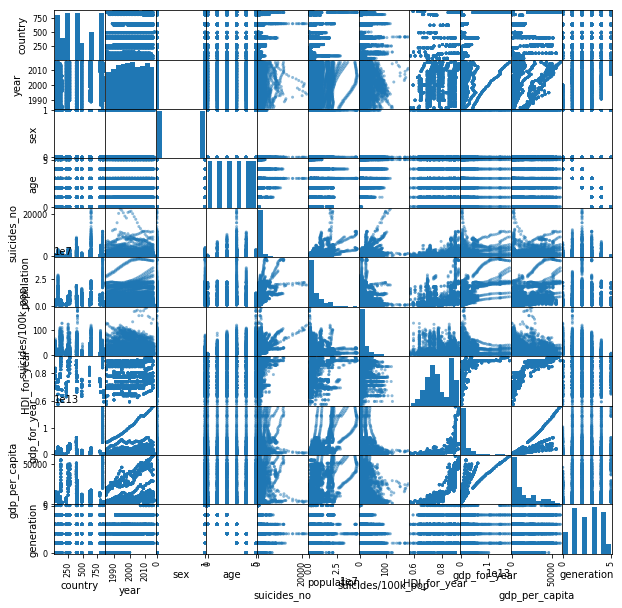

In [0]:
pd.plotting.scatter_matrix(d, figsize=(10,10));

## $X_3$: Ensayo de modelos:

Modelos de regresion conocidos:

- **DecisionTreeRegressor** \\
 **MP:** \\
 **MAC:** \\
- **SVR** \\
 **MP:** \\
 **MAC:** \\
- **RandomForestRegressor** \\
 **MP:** \\
 **MAC:** \\
- **LinearRegression** \\
 **MP:** \\
 **MAC:** \\
- **Ridge** \\
 **MP:** \\
 **MAC:** \\
- **RidgeCV** \\
 **MP:** \\
 **MAC:** \\
- **Lasso** \\
 **MP:** \\
 **MAC:** \\
- **BayesianRidge** \\
 **MP:** \\
 **MAC:** \\
- **Logistic regression** \\
 **MP:** \\
 **MAC:** \\
- **PolynomialFeatures** \\
 **MP:** \\
 **MAC:** \\
 
**NOTA:**  **MP:** Mejores Parametros,  **MAC:**  Mejor Accuracy

In [0]:
d.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,32,1985,0,5,202,363000,55.65,Argentina1985,0.694,88.417,3264,0
1,32,1985,0,4,485,1997000,24.29,Argentina1985,0.694,88.417,3264,0
2,32,1985,0,3,414,3346300,12.37,Argentina1985,0.694,88.417,3264,1
3,32,1985,1,4,210,2304000,9.11,Argentina1985,0.694,88.417,3264,0
4,32,1985,0,2,177,2234200,7.92,Argentina1985,0.694,88.417,3264,2


In [0]:
d.shape

(4920, 12)

In [0]:
X = d.values[:,[0,1,2,3,5,8,9,10,11]]
y = d.values[:,4]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor

test_size = 0.2

d_train, d_test, c_train, c_test = train_test_split(X,y,test_size=test_size)

print "dimensiones train", d_train.shape, c_train.shape
print "dimsensions test ", d_test.shape, c_test.shape

g = RandomForestRegressor()
g.fit(d_train, c_train)
print "acierto en train", g.score(d_train, c_train)
print "acierto en test ", g.score(d_test, c_test)

predicciones_train = g.predict(d_train)
predicciones_test  = g.predict(d_test)

dimensiones train (3936, 9) (3936,)
dimsensions test  (984, 9) (984,)
acierto en train 0.9979524485271307
acierto en test  0.98741812703103


## $X_4$: Interpretacion y pruebas del modelo seleccionado:

In [0]:
X[100,]

array([32, 1993, 1, 5, 698400, 0.78, 236.74200000000002, 7768, 0],
      dtype=object)

In [0]:
y[100]

58

In [0]:
prueba0 = np.array([[32, 1993, 1, 5, 698400, 0.78, 236.74200000000002, 7768, 0]],
      dtype=object)
prueba0

array([[32, 1993, 1, 5, 698400, 0.78, 236.74200000000002, 7768, 0]],
      dtype=object)

In [0]:
g.predict(prueba0)

array([54.1])

### Propuesto 1:  El año afecta minimamente al numero de suicidios

> Bloque con sangría



In [0]:
def year(sample, index):
  for i in np.unique(d.year):
    sample[0][1] = i
    eje.append(g.predict(sample))

  plt.xlabel('Year')
  plt.ylabel('Suicides No')
  titulo = country_codes.English_short_name_lower_case[country_codes.Numeric_code == sample[0][0]].values[0]
  plt.title(titulo)  
  plt.plot(np.unique(d.year),eje)

  return d[d.index == index]

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
4672,860,1991,1,5,30,216200,13.88,Uzbekistan1991,0.65,13.678,788,0


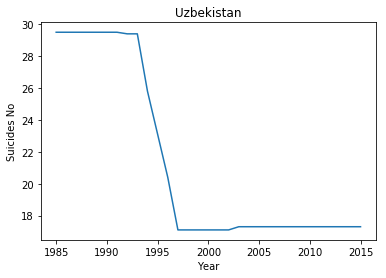

In [0]:
eje = []
import random
tamano = len(X)

ran = random.randrange(tamano)

sample = np.array([X[4672]],dtype=object)
year(sample = sample, index = 4672)

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
3953,804,1987,1,4,1024,6070300,16.87,Ukraine1987,0.713,64.088,1353,0


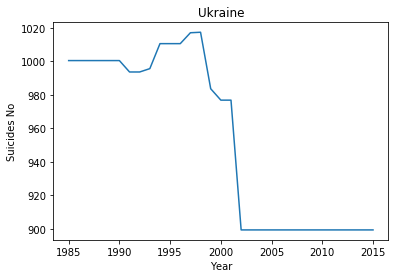

In [0]:
eje = []
import random
tamano = len(X)
ran = random.randrange(tamano)
sample = np.array([X[ran]],dtype=object)
for i in np.unique(d.year):
  sample[0][1] = i
  eje.append(g.predict(sample))
 
plt.xlabel('Year')
plt.ylabel('Suicides No')
titulo = country_codes.English_short_name_lower_case[country_codes.Numeric_code == sample[0][0]].values[0]
plt.title(titulo)  
plt.plot(np.unique(d.year),eje)

d[d.index == ran]

### Presupuesto 2: El sexo influye en gran medida.




[[804 2005 1 5 800543 0.713 86.14200000000001 1917 1]]
('Reales:', 561)
('Predichos:', array([9.1]))


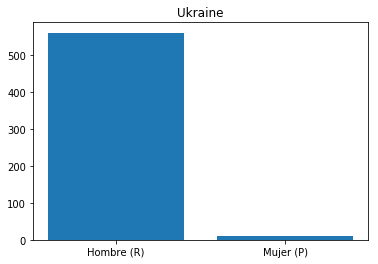

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
4164,804,2005,0,5,561,800543,70.08,Ukraine2005,0.713,86.142,1917,1


In [0]:
import random
tamano = len(X)
ran = random.randrange(tamano)
sample = np.array([X[ran]],dtype=object)

if (d.sex[d.index == ran].values[0] == 0):
  sample[0][2] = 1
else:
  sample[0][2] = 0

predict = g.predict(sample)

if (sample[0][2] == 1):
  bars = ('Hombre (R)','Mujer (P)')
else:
  bars = ('Mujer (R)','Hombre (P)')
 
print(sample)
print("Reales:",d.suicides_no[d.index == ran].values[0])
print("Predichos:",predict)

y_pos = np.arange(len(bars))
titulo = country_codes.English_short_name_lower_case[country_codes.Numeric_code == sample[0][0]].values[0]
plt.title(titulo)  
plt.bar(y_pos,[d.suicides_no[d.index == ran].values[0], predict])
plt.xticks(y_pos, bars)
plt.show()

d[d.index == ran]

### Presupuesto 3: La poblacion influye en gran medida con el numero de suicidios.

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
2736,392,2014,0,5,2254,6104000,36.93,Japan2014,0.891,4850.414,40328,1


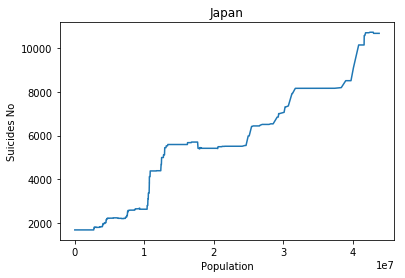

In [0]:
eje = []
import random
tamano = len(X)
ran = random.randrange(tamano)
sample = np.array([X[ran]],dtype=object)
for i in np.unique(d.population):
  sample[0][4] = i
  eje.append(g.predict(sample))

 
plt.xlabel('Population')
plt.ylabel('Suicides No')
titulo = country_codes.English_short_name_lower_case[country_codes.Numeric_code == sample[0][0]].values[0]
plt.title(titulo)  
plt.plot(np.unique(d.population),eje)

d[d.index == ran]

### Presupuesto 4: La edad de la persona

[[124 2007 0 0 1986129 0.8809999999999999 1464.977 46890 5]]
[[124 2007 0 1 1986129 0.8809999999999999 1464.977 46890 5]]
[[124 2007 0 2 1986129 0.8809999999999999 1464.977 46890 5]]
[[124 2007 0 3 1986129 0.8809999999999999 1464.977 46890 5]]
[[124 2007 0 4 1986129 0.8809999999999999 1464.977 46890 5]]
[[124 2007 0 5 1986129 0.8809999999999999 1464.977 46890 5]]


,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
1270,124,2007,0,0,18,1986129,0.91,Canada2007,0.881,1464.977,46890,5


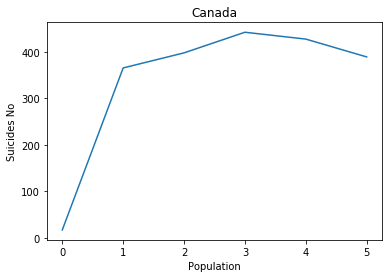

In [0]:
eje = []
import random
tamano = len(X)
ran = random.randrange(tamano)
sample = np.array([X[ran]],dtype=object)
for i in np.unique(d.age):
  sample[0][3] = i
  print(sample)
  eje.append(g.predict(sample))

 
plt.xlabel('Population')
plt.ylabel('Suicides No')
titulo = country_codes.English_short_name_lower_case[country_codes.Numeric_code == sample[0][0]].values[0]
plt.title(titulo)  
plt.plot(np.unique(d.age),eje)

d[d.index == ran]

In [0]:
max(d.population)

43805214

In [0]:
prueba1 = np.array([[32,1985,0,5,363000,0.694,88.417,3264,0]],
      dtype=object)
g.predict(prueba1)

In [0]:
d.head()

In [0]:
from sklearn.ensemble import RandomForestRegressor
show_curve(RandomForestRegressor())

In [0]:
from sklearn.linear_model import Ridge
show_curve(Ridge())

In [0]:
from sklearn.ensemble import RandomForestRegressor
n = int(len(d[d.country == 32])*0.9)
est = RandomForestRegressor(n_estimators = 10)
perm = np.random.permutation(len(d[d.country == 32]))

Xtr, ytr = X[perm[:n]], y[perm[:n]]
Xts, yts = X[perm[n:]], y[perm[n:]]

est.fit(Xtr, ytr)
print "MSE %.3f"% mean_squared_error(yts, est.predict(Xts))

In [0]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,11)
    for nfolds in nfolds_range:
        print nfolds,
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()